<a href="https://colab.research.google.com/github/aryaman-data/Credit-Card-Fraud-Detection/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
%matplotlib inline

In [ ]:
# ─────────────────────────────────────────────
# 1.DATASET
# ─────────────────────────────────────────────

df = pd.read_csv("/content/creditcard.csv")

print("=" * 55)
print("Dataset Overview")
print("=" * 55)
print(df.head())
print(f"\nShape : {df.shape}")



Dataset Overview
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

In [ ]:
# ─────────────────────────────────────────────
# 2. NULL VALUES
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Null Value Check")
print("=" * 55)
print(df.isnull().sum())


Null Value Check
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# ─────────────────────────────────────────────
# 3. TRANSACTION COUNTS
# ─────────────────────────────────────────────
genuine   = df[df["Class"] == 0]
fraud     = df[df["Class"] == 1]
total     = len(df)
pct_fraud = (len(fraud) / total) * 100

print("\n" + "=" * 55)
print("Transaction Distribution")
print("=" * 55)
print(f"Total Transactions     : {total}")
print(f"Genuine Transactions   : {len(genuine)}")
print(f"Fraudulent Transactions: {len(fraud)}")
print(f"Fraud Percentage       : {pct_fraud:.4f}%")



Transaction Distribution
Total Transactions     : 284807
Genuine Transactions   : 284315
Fraudulent Transactions: 492
Fraud Percentage       : 0.1727%



Bar Graph Visualization
transaction_distribution


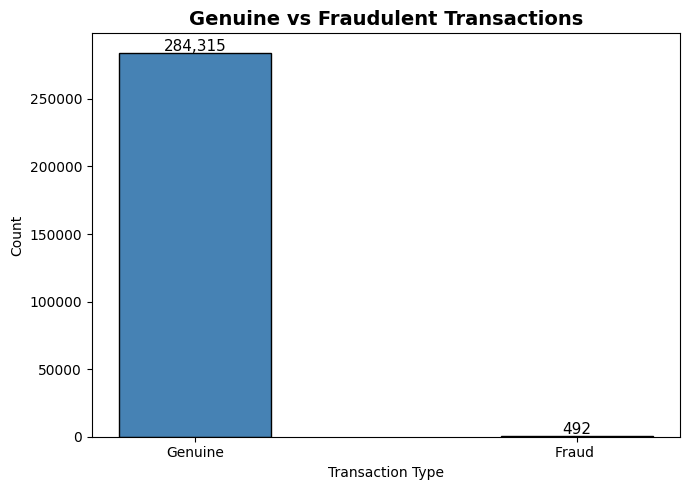

In [ ]:
# ─────────────────────────────────────────────
# 4. BAR GRAPH – Genuine vs Fraud
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Bar Graph Visualization")
print("=" * 55)

labels  = ["Genuine", "Fraud "]
counts  = [len(genuine), len(fraud)]
colors  = ["steelblue", "tomato"]

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, counts, color=colors, edgecolor="black", width=0.4)
ax.set_title("Genuine vs Fraudulent Transactions", fontsize=14, fontweight="bold")
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Count")
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + total * 0.005,
            f"{count:,}", ha="center", fontsize=11)
plt.tight_layout()
plt.savefig("transaction_distribution", dpi=150)
print("transaction_distribution")

In [ ]:
# ─────────────────────────────────────────────
# 5. NORMALISE 'Amount' COLUMN
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Normalising Amount Column")
print("=" * 55)

scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df[["Amount"]])

# Drop original Amount and Time (if present) before modelling
df_model = df.drop(columns=["Amount", "Time"], errors="ignore")
print("NormalizedAmount column added. Sample values:")
print(df_model[["NormalizedAmount", "Class"]].head())


Normalising Amount Column
NormalizedAmount column added. Sample values:
   NormalizedAmount  Class
0          0.244964      0
1         -0.342475      0
2          1.160686      0
3          0.140534      0
4         -0.073403      0


In [ ]:
# ─────────────────────────────────────────────
# 6. TRAIN / TEST SPLIT  (70 : 30)
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Train / Test Split (70:30)")
print("=" * 55)

X = df_model.drop("Class", axis=1)
y = df_model["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print(f"Training samples : {X_train.shape[0]}")
print(f"Testing  samples : {X_test.shape[0]}")



Train / Test Split (70:30)
Training samples : 199364
Testing  samples : 85443


In [ ]:
# ─────────────────────────────────────────────
# 7. TRAIN MODELS
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Training Models")
print("=" * 55)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree  – Training complete.")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
print("Random Forest  – Training complete.")



STEP 7 – Training Models
Decision Tree  – Training complete.
Random Forest  – Training complete.


In [ ]:
# ─────────────────────────────────────────────
# 8. PREDICTIONS
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Predictions")
print("=" * 55)

dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Decision Tree  – First 10 predictions:", dt_pred[:10])
print("Random Forest  – First 10 predictions:", rf_pred[:10])
print("Actual labels  – First 10 values     :", y_test.values[:10])


STEP 8 – Predictions
Decision Tree  – First 10 predictions: [0 0 0 0 0 0 0 0 0 0]
Random Forest  – First 10 predictions: [0 0 0 0 0 0 0 0 0 0]
Actual labels  – First 10 values     : [0 0 0 0 0 0 0 0 0 0]


In [ ]:
 #─────────────────────────────────────────────
# 9. ACCURACY
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Model Accuracy")
print("=" * 55)

dt_acc = dt_model.score(X_test, y_test)
rf_acc = rf_model.score(X_test, y_test)

print(f"Decision Tree Accuracy : {dt_acc * 100:.4f}%")
print(f"Random Forest Accuracy : {rf_acc * 100:.4f}%")

if rf_acc > dt_acc:
    print("\n>> Random Forest has HIGHER accuracy.")
else:
    print("\n>> Decision Tree has HIGHER accuracy.")



STEP 9 – Model Accuracy
Decision Tree Accuracy : 99.9239%
Random Forest Accuracy : 99.9532%

>> Random Forest has HIGHER accuracy.



Performance Metrics

────────────────────────────────────────
  Decision Tree
────────────────────────────────────────
Accuracy  : 99.9239%

Classification Report:
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     85295
       Fraud       0.81      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443


────────────────────────────────────────
  Random Forest
────────────────────────────────────────
Accuracy  : 99.9532%

Classification Report:
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     85295
       Fraud       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrices.png


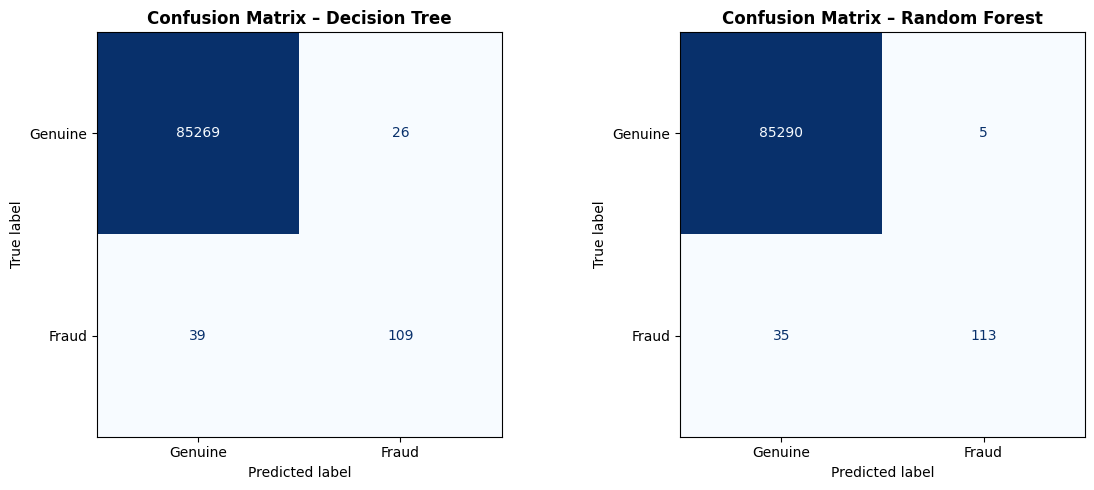

In [ ]:
# ─────────────────────────────────────────────
# 10. PERFORMANCE MATRIX
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("Performance Metrics")
print("=" * 55)

for name, pred in [("Decision Tree", dt_pred), ("Random Forest", rf_pred)]:
    print(f"\n{'─'*40}")
    print(f"  {name}")
    print(f"{'─'*40}")
    print(f"Accuracy  : {accuracy_score(y_test, pred) * 100:.4f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, pred,
                                 target_names=["Genuine", "Fraud"]))

# Confusion Matrix plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, name, pred in zip(axes,
                           ["Decision Tree", "Random Forest"],
                           [dt_pred, rf_pred]):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Genuine", "Fraud"])
    disp.plot(ax=ax, colorbar=False, cmap="Blues")
    ax.set_title(f"Confusion Matrix – {name}", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.savefig("confusion_matrices.png", dpi=150)
print("confusion_matrices.png")


In [ ]:

# ─────────────────────────────────────────────
# SUMMARY
# ─────────────────────────────────────────────
print("\n" + "=" * 55)
print("FINAL SUMMARY")
print("=" * 55)
print(f"{'Model':<20} {'Accuracy':>10}")
print("-" * 32)
print(f"{'Decision Tree':<20} {dt_acc*100:>9.4f}%")
print(f"{'Random Forest':<20} {rf_acc*100:>9.4f}%")
winner = "Random Forest" if rf_acc >= dt_acc else "Decision Tree"
print(f"\nBest Performing Model : {winner}")


FINAL SUMMARY
Model                  Accuracy
--------------------------------
Decision Tree          99.9239%
Random Forest          99.9532%

Best Performing Model : Random Forest


In [ ]:

from google.colab import files
files.download('transaction_distribution.png')
files.download('confusion_matrices.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>